# Alzheimer's Disease and Healthy Aging

In [121]:
# Import libraries
# Plotting and dataframe
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [122]:
# Import data
df = pd.read_csv("alzheimers_disease_data.csv")
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Since the relevant categorical variables (gender, ethnicity, education level etc.) are already encoded as integers, we will not have to perform One Hot Encoding on these columns.

In [124]:
# Checking for null values
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

# Data Cleaning

### Dropped columns
* __PatientID__ (Doesn't tell us anything useful)
* __DoctorInCharge__ (Confidential and doesn't tell us anything useful)

### Null Values
* There are luckily no null values so we will not have to perform any imputing

### Handling Categorical and Numerical Features
* 

In [125]:
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [126]:
# Checking for duplicates
df.duplicated().sum()

0

In [127]:
# To make it easier, I changed 'Diagnosis' to 'target'
df.rename(columns={'Diagnosis': 'target'}, inplace=True)

df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,target
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


# Feature Engineering

1. Health Score
    - This metric is a combination of health measures into one score, from 0 to 1, with 1 representing perfect health and 0 representing bad health.
    - The weights assigned were calculated using Feature Importance from a random forest model, which shows the specific weights assigned to each attribute that is related to health. This is done to ensure each attribute is being accurately assessed on its contributions to overall health score
2. Count of Health Issues
    - Combining __FamilyHistoryAlzheimers__, __CardiovascularDisease__, __Diabetes__, __Depression__, __HeadInjury__, __Hypertension__ into a count of health issues according to medical history
3. Education + Ethnicity
    - Highlights the interaction between the two variables.
        - 0_0 represents a Caucasian with no education
        - 0_1 represents a Caucasian with a high school diploma
        - 0_2 represents a Caucasian with a bachelor's degree
        - 0_3 represents a Caucasian with an advanced degree
        - The same applies for 1_X (African American), 2_X (Asian), or 3_X (Other)

In [128]:
# Define helper function to get weights of the columns
def get_weights(df, columns):
    X = df[columns]
    y = df['target']
    model = RandomForestClassifier()
    model.fit(X, y)
    weights = model.feature_importances_
    return dict(zip(columns, weights))


# Define column names and get weights
health_columns = ['BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'Smoking', 'AlcoholConsumption']
health_weights = get_weights(df, health_columns)

cardiometabolic_columns = ['SystolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                           'CholesterolTriglycerides']
cardiometabolic_weights = get_weights(df, cardiometabolic_columns)

# Update DF
scaler = MinMaxScaler()

# Update health related columns
for col in health_columns:
    df[col] = scaler.fit_transform(df[[col]])

# Update cardiometabolic related columns
for col in cardiometabolic_columns:
    df[col] = scaler.fit_transform(df[[col]])

# Calculate HealthScore, CardiometabolicIndex and TotalHealthScore
df['HealthScore'] = sum(df[col] * weight for col, weight in health_weights.items())
df['CardiometabolicIndex'] = sum(df[col] * weight for col, weight in cardiometabolic_weights.items())
df['TotalHealthScore'] = df['HealthScore'] + df['CardiometabolicIndex']

# Normalize CardiometabolicIndex and TotalHealthScore
for col in ['CardiometabolicIndex', 'TotalHealthScore']:
    df[col] = scaler.fit_transform(df[[col]])

df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,target,HealthScore,CardiometabolicIndex,TotalHealthScore
0,73,0,0,2,0.316960,0.0,0.665183,0.633375,0.133931,0.837564,...,1.725883,0,0,0,1,0,0,0.506834,0.327569,0.366792
1,89,0,0,0,0.473058,0.0,0.227170,0.762862,0.050995,0.525021,...,2.592424,0,0,0,0,1,0,0.400602,0.711261,0.563535
2,73,0,3,1,0.111553,0.0,0.978276,0.785408,0.181896,0.945597,...,7.119548,0,1,0,1,0,0,0.587423,0.517924,0.584669
3,74,1,0,1,0.752163,1.0,0.610751,0.843804,0.743443,0.731994,...,6.481226,0,0,0,0,0,0,0.743281,0.349374,0.596767
4,89,0,0,0,0.228472,0.0,0.923204,0.631707,0.078698,0.265892,...,0.014691,0,0,1,1,0,0,0.413732,0.438253,0.367191


In [137]:
print(health_weights, '\n', cardiometabolic_weights)

{'BMI': 0.19499281849430342, 'PhysicalActivity': 0.19696215014836904, 'DietQuality': 0.19389015417300054, 'SleepQuality': 0.19961961093220743, 'Smoking': 0.023436508379665644, 'AlcoholConsumption': 0.19109875787245387} 
 {'SystolicBP': 0.166725804187908, 'CholesterolTotal': 0.20320179736359323, 'CholesterolLDL': 0.20533531814612616, 'CholesterolHDL': 0.21737931297608884, 'CholesterolTriglycerides': 0.20735776732628383}


In [129]:
# Creating count of health issues
health_issues_columns = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']
df['NumHealthIssues'] = df[health_issues_columns].sum(axis=1)

In [130]:
# Creating Education + Ethnicity
df['EducationEthnicity'] = df['Ethnicity'].astype(str) + "_" + df['EducationLevel'].astype(str)

# Exploratory Data Analysis

In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,0.506199,0.288883,0.000000,0.264272,0.512933,0.754923,1.000000
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,0.502191,0.288079,0.000000,0.257054,0.496936,0.758278,1.000000
PhysicalActivity,2149.0,0.492456,0.286182,0.000000,0.257117,0.477053,0.743632,1.000000
DietQuality,2149.0,0.498926,0.291227,0.000000,0.245178,0.507230,0.755758,1.000000
SleepQuality,2149.0,0.508312,0.294065,0.000000,0.246843,0.519077,0.760335,1.000000


Takeaways:
- The people in this dataset, on average, are less educated (1.2)
- There are more smokers in this dataset (0.71)
- Physical activity, diet quality, and sleep quality are generally average, at around 0.5
- Most of the data points in this dataset have no Alzheimer's diagnosis (around 65%)

#### Looking at balance of the target variable

Not Diagnosed with Alzheimer's Count: 1389 (64.63%)
Diagnosed with Alzheimer's Count: 760 (35.37%)


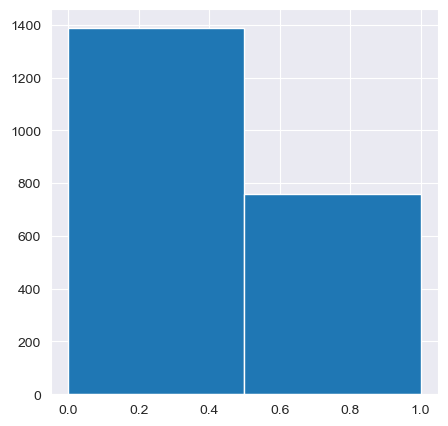

In [143]:
# Plotting histogram of 'target'
df['target'].hist(bins=2, figsize=(5,5))

# Getting count of diagnoses of NO and YES
print(f"Not Diagnosed with Alzheimer's Count: {(df['target'] == 0).sum()} ({round((df['target'] == 0).sum() / df.shape[0] * 100, 2)}%)")
print(f"Diagnosed with Alzheimer's Count: {(df['target'] == 1).sum()} ({round((df['target'] == 1).sum() / df.shape[0] * 100, 2)}%)")
plt.show()

Interpretation: 64% of patients in this dataset were not diagnosed, while 35% were diagnosed. This represents a moderately unbalanced dataset, which might be addressed later

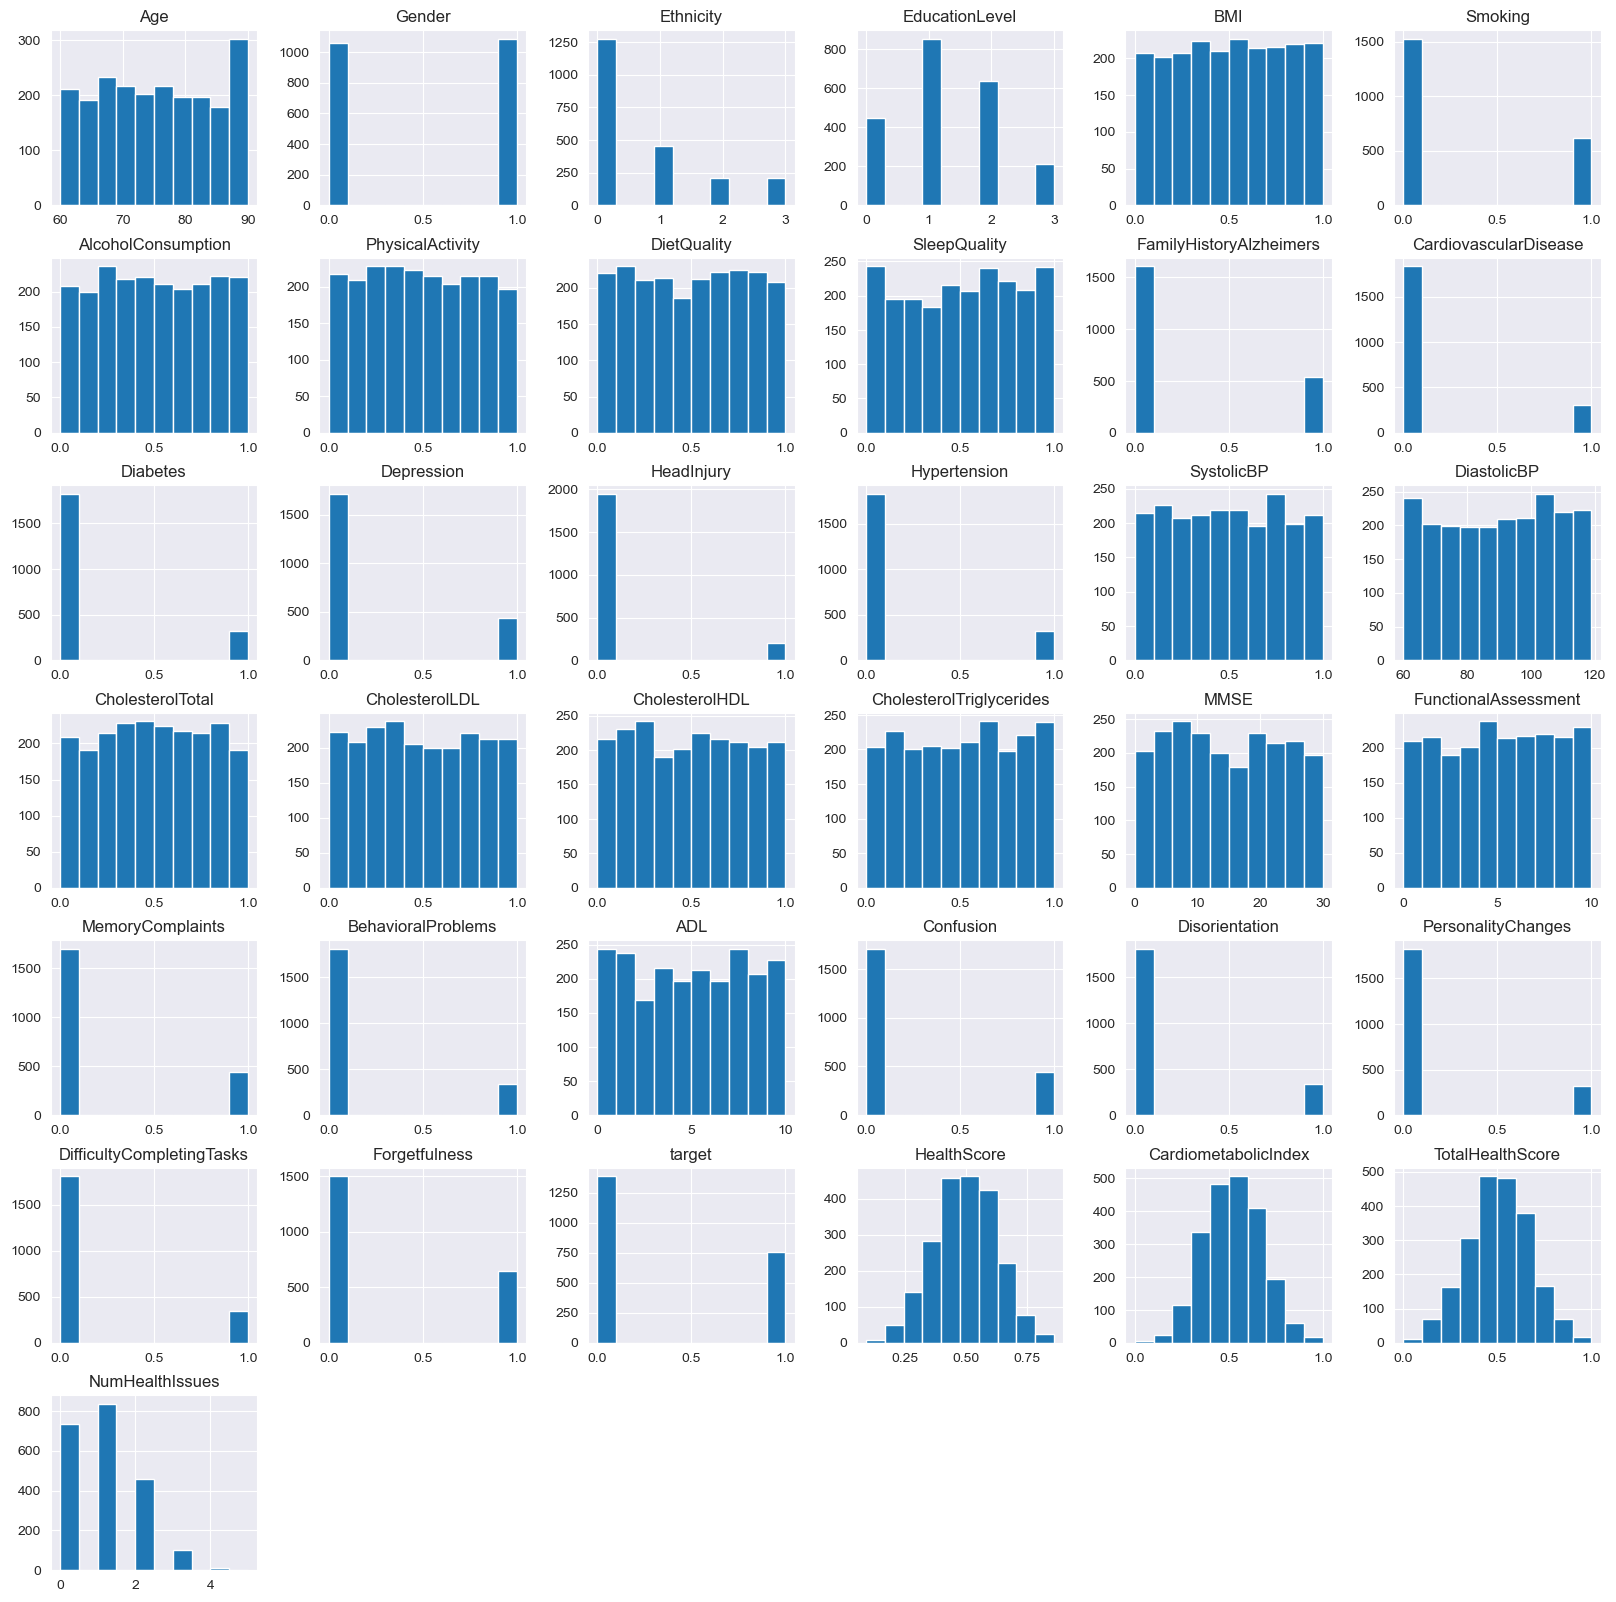

In [133]:
df.hist(figsize=(20,20))
plt.show()

Let's take a look at correlations now

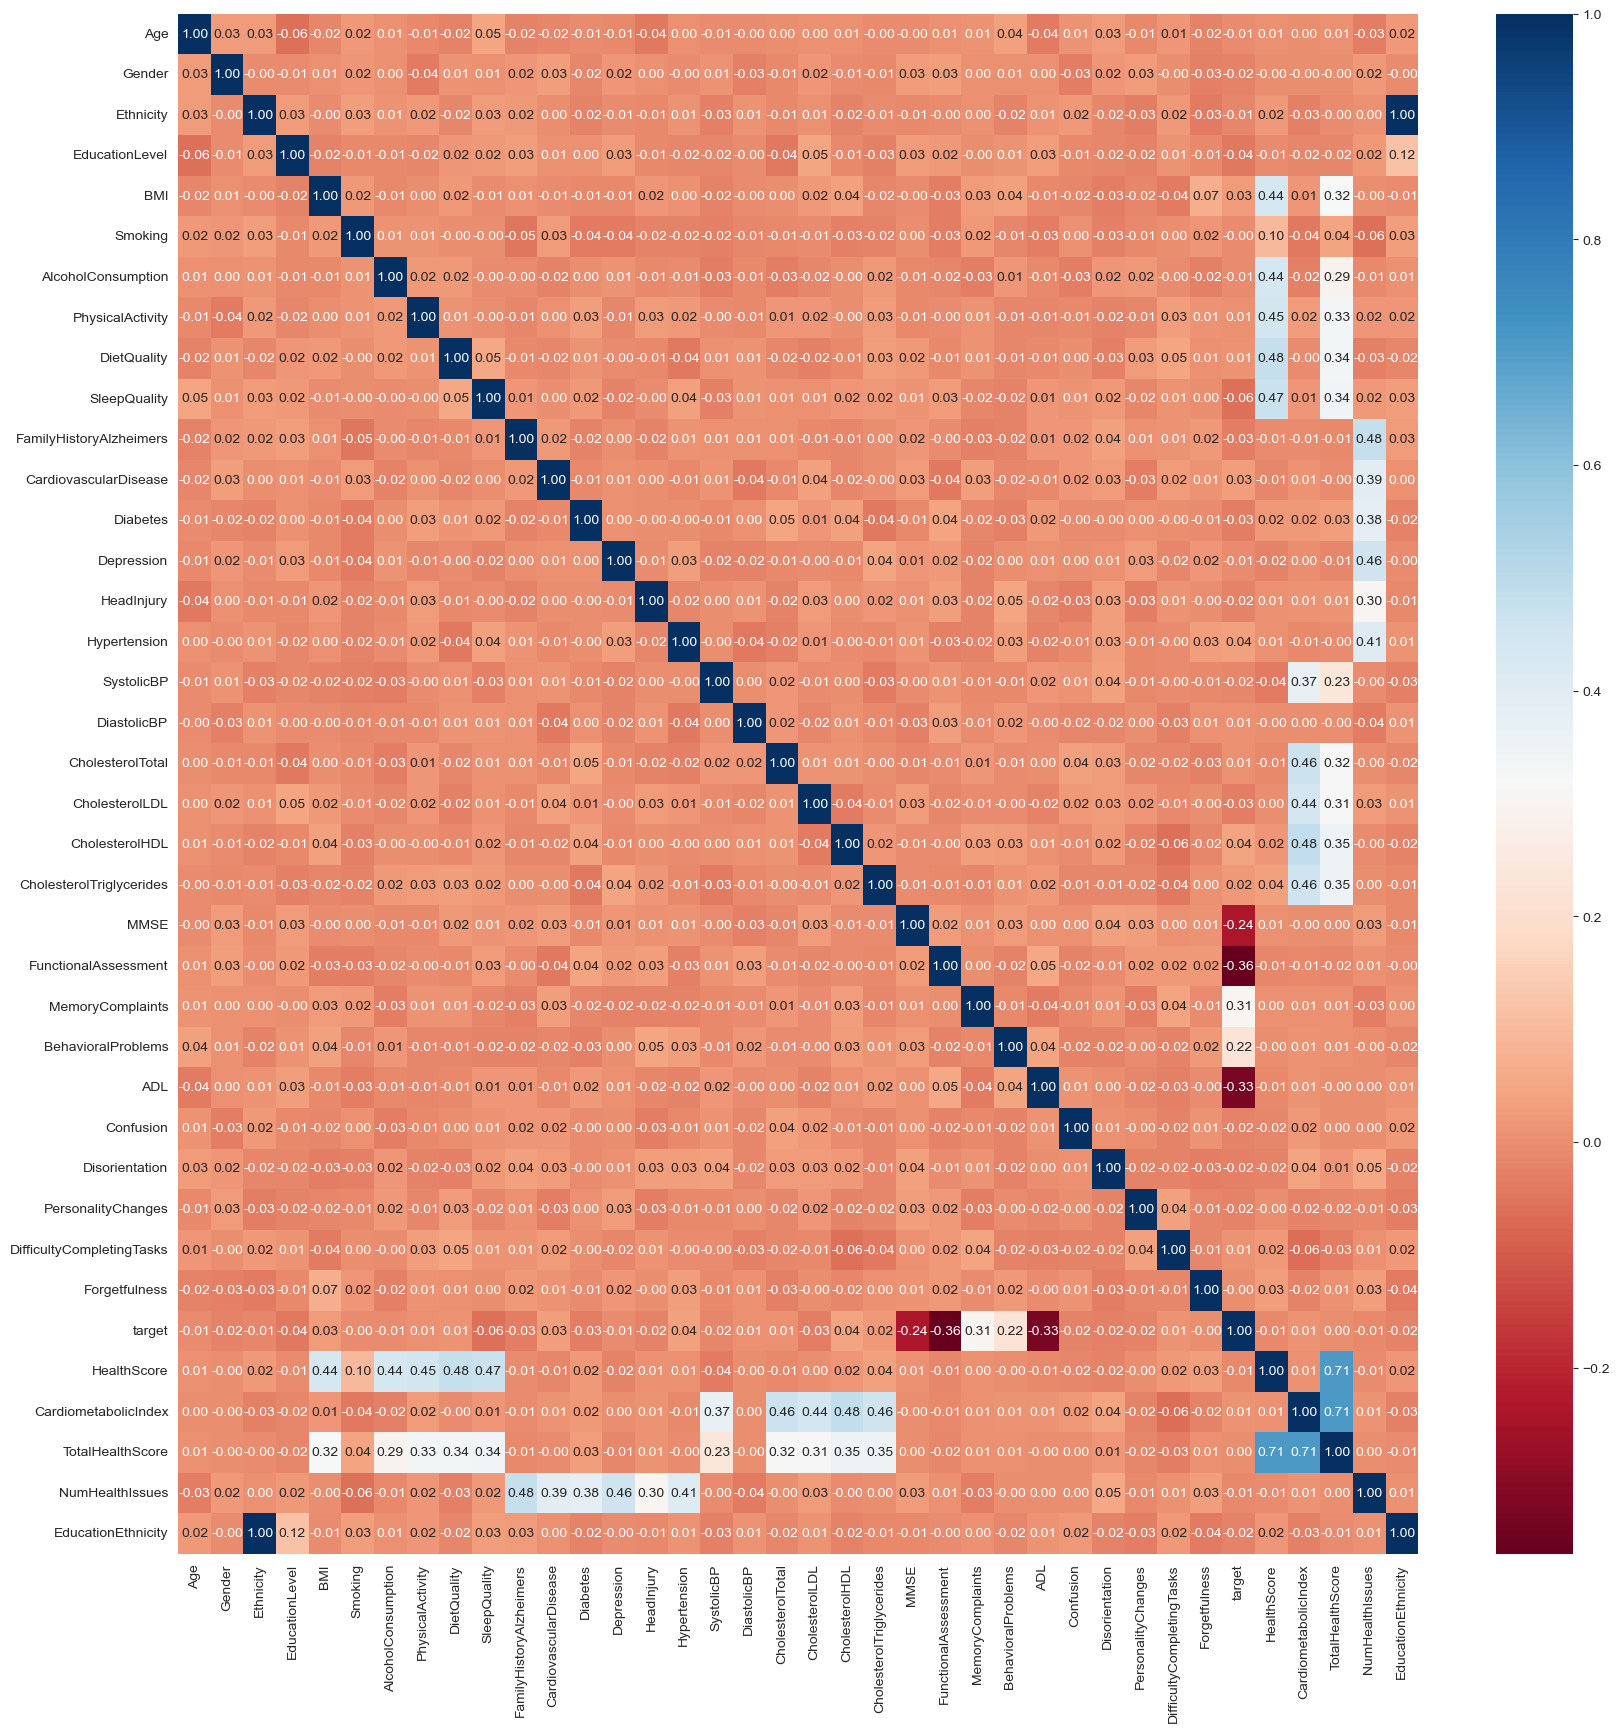

In [134]:
# Creating correlation matrix
correlations = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='RdBu')
plt.show()

In [135]:
# looking at correlation with target more closely
correlations['target'].sort_values(ascending=False)

target                       1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
CardiometabolicIndex         0.013627
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
PhysicalActivity             0.005945
DiastolicBP                  0.005293
TotalHealthScore             0.001452
Forgetfulness               -0.000354
Smoking                     -0.004865
Age                         -0.005488
Depression                  -0.005893
AlcoholConsumption          -0.007618
HealthScore                 -0.011491
NumHealthIssues             -0.011744
Ethnicity                   -0.014782
SystolicBP                  -0.015615
EducationEthnicity          -0.018653
Confusion                   -0.019186
PersonalityC

### Interpretation:
- **MemoryComplaints** is the most highly correlated feature. It makes sense, as Alzheimer's is associated with a decline in memory, so the more memory complaints, the more likely it is that patient develops Alzheimer's
- **BehavioralProblems** is the second most highly correlated feature, which also makes sense as more behavioral problems are associated with Alzheimer's
- Interestingly enough, metrics like **TotalHealthScore**, any health metric like **PhysicalActivity**, and **Smoking** or **AlcoholConsumption** do not seem to be correlated. This might be due to the interaction these columns have with **CardiovascularDisease**, which seems to be more correlated, albeit not by much.

# Model Building

Now it's time to test out some models!